In [10]:
!pip install -U dopamine-rl

In [11]:
#Necessary import
import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Dopamine gin-config
DQN_PATH = '/tmp'
dqn_config = """
#Necessary import
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables

#Agent settings
DQNAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
DQNAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
DQNAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
DQNAgent.network = @gym_lib.CartpoleDQNNetwork
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:0'
DQNAgent.optimizer = @tf.train.AdamOptimizer()
tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

#Environment settings
create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment

#Training settings
Runner.num_iterations = 400
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 200

#Buffer settings
WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

([],
 ['dopamine.discrete_domains.gym_lib',
  'dopamine.discrete_domains.run_experiment',
  'dopamine.agents.dqn.dqn_agent',
  'dopamine.replay_memory.circular_replay_buffer',
  'gin.tf.external_configurables'])

In [16]:
#Training agent
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
dqn_runner.run_experiment()

Reading statistics from: /tmp//logs/log_399


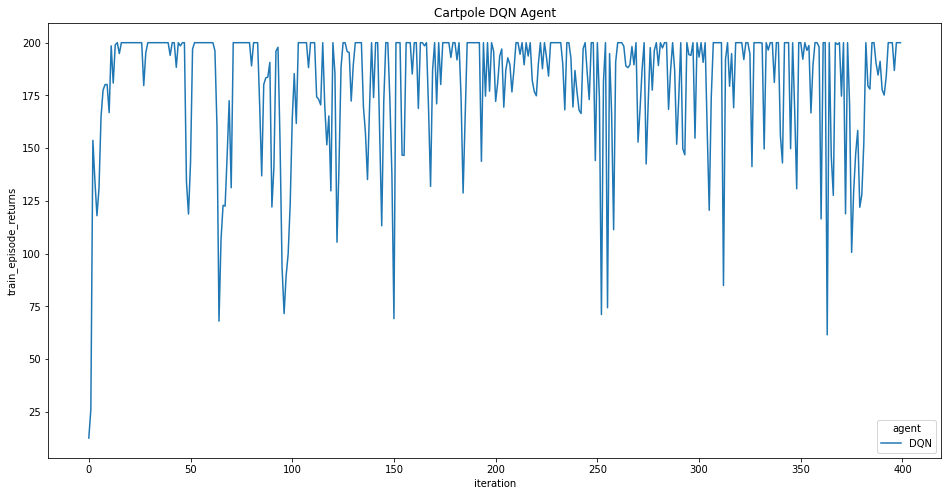

In [17]:
#Plot DQN agent results
data = colab_utils.read_experiment(DQN_PATH, verbose=True, summary_keys=['train_episode_returns'])
data['agent'] = 'DQN'
data['run'] = 1

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='agent', data=data, ax=ax)
plt.title('Cartpole DQN Agent')
plt.show()